In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import warnings
warnings.filterwarnings('ignore')

In [14]:
if os.path.exists('data_q.csv'):
    df = pd.read_csv('data_q.csv')
else:
    import cx_Oracle
    con = cx_Oracle.connect(user='common',password='Nwpass_Rkcol_0819',
                                    dsn='dwproddc',encoding = 'utf-8',
                                    nencoding = 'utf-8')
    select = """select a.MONTH, a.unit_code_desc,max(a.quintile) quintile
    from HH_CHECK_QUINTILE_DETAIL a
    group by a.MONTH, a.unit_code_desc
    """
    df = pd.read_sql(select, con)
    df.to_csv('data_q.csv', index=False)
df.head()

,MONTH,UNIT_CODE_DESC,QUINTILE
0,2019/05,EF00101-EF00101-Nguyễn Văn Quân,5.0
1,2019/05,FC0036-FC0036 - Lê Ngọc Duy,4.0
2,2019/05,FC0337-FC0337-Từ Kiện Tuấn,3.0
3,2019/05,FC0211-FC0211-Nguyễn Hải Đăng,NaN
4,2019/05,FC0295-FC0295-Nguyễn Duy Linh,4.0


In [15]:
df.MONTH.value_counts()

2020/03    1492
2020/04    1436
2020/02    1414
2020/01    1387
2019/12    1370
2019/11    1340
2019/10    1276
2019/09    1234
2019/08    1217
2019/07    1205
2019/06    1169
2019/05    1074
Name: MONTH, dtype: int64

In [16]:
df.MONTH.unique()

array(['2019/05', '2019/06', '2019/07', '2019/08', '2019/09', '2019/10',
       '2019/11', '2019/12', '2020/01', '2020/02', '2020/03', '2020/04'],
      dtype=object)

num_month = 3

months = ['2019/05', '2019/06', '2019/07', '2019/08']
a = df[df.MONTH == months[0]]['UNIT_CODE_DESC'].tolist()
b = df[df.MONTH == months[1]]['UNIT_CODE_DESC'].tolist()
c = df[df.MONTH == months[2]]['UNIT_CODE_DESC'].tolist()
fc_list = list(set(a) & set(b) & set(c))
len(fc_list)

for i,month in enumerate(months):
    dt_temp = df[(df.MONTH == month) & (df.UNIT_CODE_DESC.isin(fc_list))][['UNIT_CODE_DESC','QUINTILE']]
    dt_temp.set_index('UNIT_CODE_DESC', inplace=True)
    dt_temp.columns = [f'QUINTILE_{i}']
    if i == 0:
        df_temp = dt_temp
    else:
        df_temp = pd.concat([df_temp, dt_temp], axis=1, sort=True)

## Tao data dong bo

In [32]:
num_month = 4
data = pd.DataFrame()
for i in range(num_month, len(df.MONTH.unique())):
    months = df.MONTH.unique()[i-num_month:i+1]
    print(months)
    # check fc exis
    #a = df[df.MONTH == months[0]]['UNIT_CODE_DESC'].tolist()
    #b = df[df.MONTH == months[1]]['UNIT_CODE_DESC'].tolist()
    #c = df[df.MONTH == months[2]]['UNIT_CODE_DESC'].tolist()
    months_df = [df[df.MONTH == months[i]]['UNIT_CODE_DESC'].tolist() for i in range(num_month-1)] 
    
    for i, x in enumerate(months_df):
        if i == 0:
            fc_list = list(set(x)) 
        else: 
            fc_list = list(set(fc_list) & set(x))
        
    print(len(fc_list))
    # gen df
    for i,month in enumerate(months):
        dt_temp = df[(df.MONTH == month) & (df.UNIT_CODE_DESC.isin(fc_list))][['UNIT_CODE_DESC','QUINTILE']]
        dt_temp.set_index('UNIT_CODE_DESC', inplace=True)
        col_name = f'QUINTILE_{i}' if i < len(months) - 1 else 'QUINTILE_Y'
        dt_temp.columns = [col_name]
        if i == 0:
            df_temp = dt_temp
        else:
            df_temp = pd.concat([df_temp, dt_temp], axis=1, sort=True)
            
    data = data.append(df_temp)
data.dropna(inplace=True)
data.head()

['2019/05' '2019/06' '2019/07' '2019/08' '2019/09']
988
['2019/06' '2019/07' '2019/08' '2019/09' '2019/10']
1070
['2019/07' '2019/08' '2019/09' '2019/10' '2019/11']
1109
['2019/08' '2019/09' '2019/10' '2019/11' '2019/12']
1134
['2019/09' '2019/10' '2019/11' '2019/12' '2020/01']
1143
['2019/10' '2019/11' '2019/12' '2020/01' '2020/02']
1188
['2019/11' '2019/12' '2020/01' '2020/02' '2020/03']
1224
['2019/12' '2020/01' '2020/02' '2020/03' '2020/04']
1262


,QUINTILE_0,QUINTILE_1,QUINTILE_2,QUINTILE_3,QUINTILE_Y
EF00087-EF00087 - Lý Quốc Việt,5.0,5.0,4.0,5.0,5.0
EF00089-EF00089 - Nguyễn Minh Hiển,3.0,5.0,2.0,4.0,5.0
EF00098-EF00098-Đặng Tiến Luận,1.0,1.0,3.0,4.0,1.0
EF00113-EF00113-Lưu Trương Hồng Chuyên,5.0,4.0,1.0,5.0,4.0
EF00137-EF00137-Phan Trung Dũng,3.0,5.0,2.0,5.0,5.0


In [19]:
## xac xuaats thay doi theo cot

In [20]:
compare=1
gr0 = data[data['QUINTILE_Y'] != 0].groupby(['QUINTILE_Y',data.columns[-1-compare]]).agg(len)['QUINTILE_0']
gr1 = data.groupby(['QUINTILE_Y']).agg(len)['QUINTILE_0']
gr = gr0/gr1
cr = pd.concat([pd.DataFrame(gr.loc[i]).T*100 for i in range(1,6)], axis=0).values.round(2)
cr

array([[53.15, 23.08, 13.05,  6.5 ,  4.22],
       [25.26, 29.85, 22.12, 14.93,  7.84],
       [15.55, 25.09, 23.29, 21.5 , 14.57],
       [ 9.48, 18.22, 26.7 , 26.09, 19.5 ],
       [ 7.79, 13.35, 21.3 , 27.58, 29.97]])

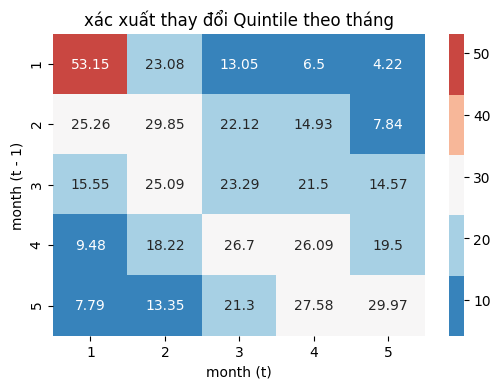

In [21]:
fig, ax = plt.subplots(dpi=100)
sns.heatmap(cr, fmt='', annot=True, cmap=sns.color_palette("RdBu_r", 5), ax=ax)
ax.set_xticklabels(range(1,6))
ax.set_yticklabels(range(1,6))
ax.set_ylabel('month (t - 1)')
ax.set_xlabel('month (t)')
plt.title('xác xuất thay đổi Quintile theo tháng')
plt.show()

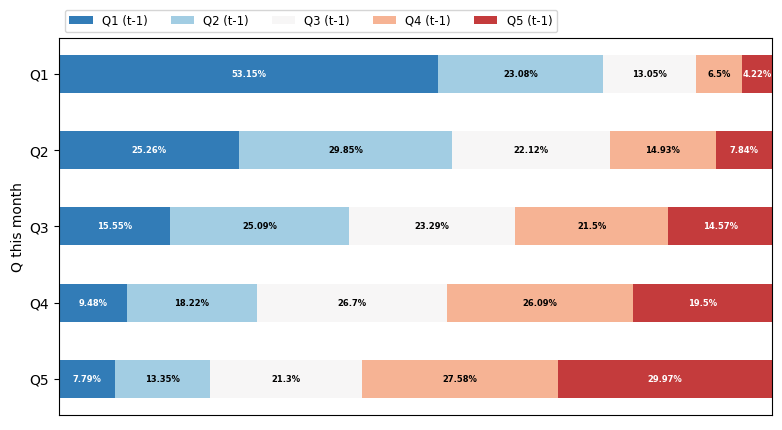

(<Figure size 920x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd73043fc50>)

In [22]:
def survey(data, compare=1):
    gr0 = data[data['QUINTILE_Y'] != 0].groupby(['QUINTILE_Y',data.columns[-1-compare]]).agg(len)['QUINTILE_0']
    gr1 = data.groupby(['QUINTILE_Y']).agg(len)['QUINTILE_0']
    gr = gr0/gr1
    
    category_names = ['Q1 (t-1)', 'Q2 (t-1)',
                      'Q3 (t-1)', 'Q4 (t-1)', 'Q5 (t-1)']
    results = {
        'Q1': gr.loc[1],
        'Q2': gr.loc[2],
        'Q3': gr.loc[3],
        'Q4': gr.loc[4],
        'Q5': gr.loc[5],
    }
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdBu_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5), dpi=100)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.3 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(c*100, 2))+'%', ha='center', va='center',
                    color=text_color, fontsize=6, fontweight='bold')
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    #plt.title(f'Q Last {compare} month')
    ax.set_ylabel(f'Q this month')
    plt.show()
    
    return fig, ax

survey(data,compare=1)

In [23]:
def plot_q(compare=1):
    gr0 = data[data['QUINTILE_Y'] != 0].groupby(['QUINTILE_Y',data.columns[-1-compare]]).agg(len)['QUINTILE_0']
    gr1 = data.groupby(['QUINTILE_Y']).agg(len)['QUINTILE_0']
    gr = gr0/gr1
    fig, axs = plt.subplots(ncols=5, figsize=(18,6),dpi=100, sharey=True, sharex=True)
    for i, ax in enumerate(axs):
        gr.loc[i+1].plot.barh(width=0.8, ax=ax, color=['#ff5a72','#ed997a','#72c1f4','#12a0b2','#2b5281'])
        #sns.barplot(x=gr.loc[i+1].values, y=gr.loc[i+1].index, ax=ax, palette='YlGn')
        ax.set_title('Q_' + str(i+1) +' this month')
        for y, x in  enumerate(gr.loc[i+1].values):
            ax.text(x, y, "%.1f " %(x*100) + '%' )
        ax.set_ylabel(f'Q Last {compare} month')
        

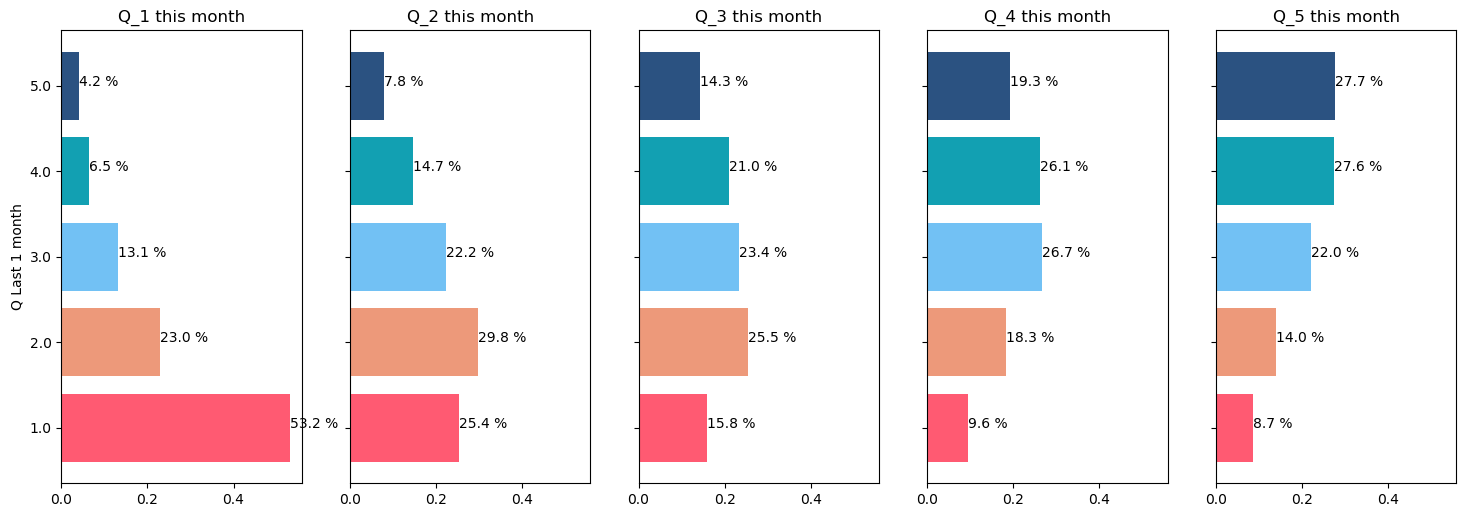

In [497]:
plot_q(compare=1)

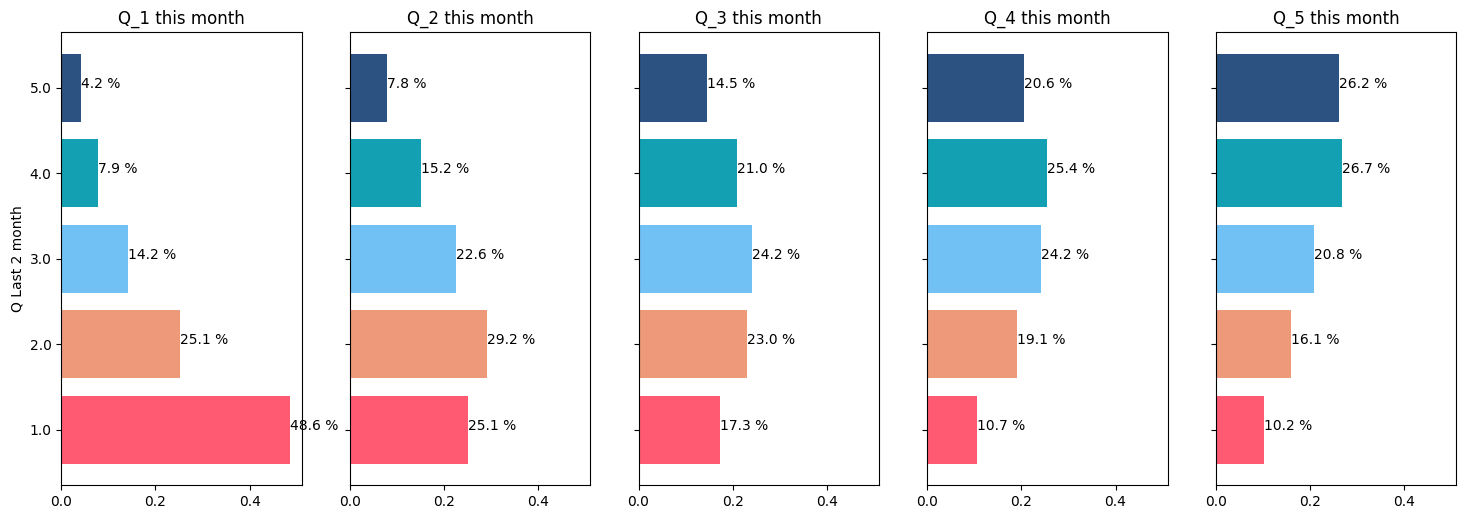

In [24]:
plot_q(compare=2)

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop(['QUINTILE_Y'],axis=1)
y = data['QUINTILE_Y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state = 15,
    stratify = y
)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [30]:
classifiers = [
    [GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), param_grid={
        'n_neighbors': [3, 7, 11]
    }, scoring='accuracy',cv=3, n_jobs=-1), "KNN"],
    [GridSearchCV(estimator=SVC(), param_grid={
        'kernel': ['linear', 'rbf'],
        'C': [0.01, 0.1],
        'gamma': [0.01, 0.1,]
    }, scoring='accuracy', cv=3, n_jobs=-1), "SVM"],
    [GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), param_grid={
        'n_estimators': [200, 500],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [ 5,7,8,9],
        'criterion': ['gini', 'entropy']
    }, scoring='accuracy', cv=3, n_jobs=-1), "RF"],
    [GridSearchCV(estimator=MLPClassifier(), param_grid={
        'solver': ['lbfgs'],
        'max_iter': [ 1500,2000],
        'alpha': 10.0 ** -np.arange(1, 3),
        'hidden_layer_sizes': np.arange(15, 20),
    }, scoring='accuracy', cv=3, n_jobs=-1), "MLP"],
    [GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid={
        'n_estimators': (5, 10),
        'base_estimator__max_depth': (5, 8, 12),
        'algorithm': ('SAMME', 'SAMME.R')
    }, scoring='accuracy', cv=3, n_jobs=-1), "Ada"]
]

In [31]:
results = []
for clf in classifiers:
    clf[0].fit(X_train, y_train)
    results.append((clf[1], clf[0].best_score_, clf[0].best_params_))
results = pd.DataFrame(results, columns=['classifier', 'acc', 'best_params']) 
results

KeyboardInterrupt: 

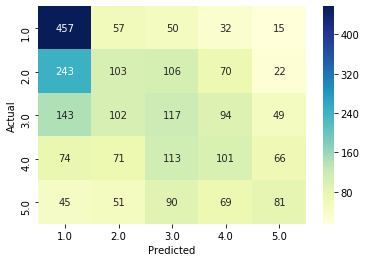

In [578]:
pred = classifiers[3][0].predict(X_test)
cr = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cr, fmt='', annot=True, cmap="YlGnBu")
plt.show()

In [581]:
pred = classifiers[3][0].predict_proba(X_test)
pred 

array([[0.37818838, 0.27476194, 0.20881885, 0.0873512 , 0.05087963],
       [0.47712372, 0.25008924, 0.14833694, 0.08120875, 0.04324135],
       [0.47524062, 0.27381933, 0.13684052, 0.07812628, 0.03597325],
       ...,
       [0.17380579, 0.22766417, 0.24389801, 0.20247877, 0.15215326],
       [0.15725912, 0.25249048, 0.23540278, 0.21411438, 0.14073323],
       [0.39837317, 0.29342973, 0.17833959, 0.08904897, 0.04080854]])

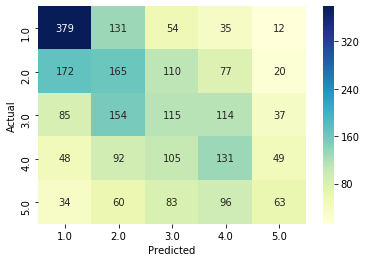

In [579]:
pred = classifiers[2][0].predict(X_test)
cr = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cr, fmt='', annot=True, cmap="YlGnBu")
plt.show()

from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(
    estimators=[
        ('MLP', classifiers[3][0]), ('RF', classifiers[2][0])
    ], voting='hard'
)
eclf1 = eclf1.fit(X_train, y_train)
scores_from_cross = cross_val_score(eclf1, X_train, y_train, cv = 3,
                                    scoring="accuracy", n_jobs = -1)
print(np.mean(scores_from_cross))

In [640]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=7, random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.24121524895955082

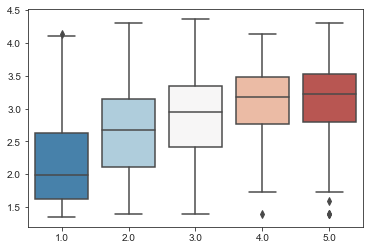

In [639]:
sns.set_palette("pastel")
sns.set_style('ticks')
pred = regr.predict(X_test)
#_, axs = plt.subplots(ncols=2, dpi=100)
sns.boxplot(x=y_test.tolist(), y=pred, palette=sns.color_palette("RdBu_r", 5))

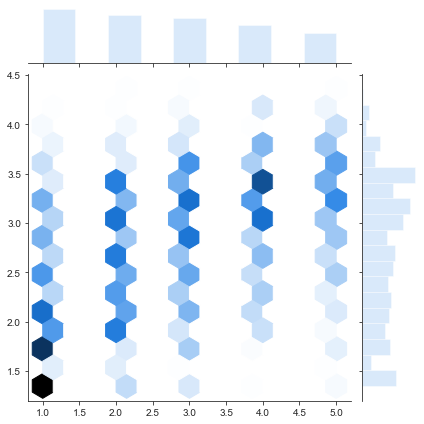

In [641]:
sns.jointplot(x=y_test.tolist(), y=pred, kind='hex')

# keras.models

In [644]:
X = data.drop(['QUINTILE_Y'],axis=1).values
y = data[['QUINTILE_Y']].values
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state = 15,
    stratify = y
)

In [ ]:
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential

# Xay dung model LSTM
warnings.filterwarnings('ignore')

# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 10))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

#regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#regressor.compile(loss='mean_squared_error',

regressor.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

regressor.summary()

numOfEpoch = 200
H = regressor.fit(X_train, y_train, 
              epochs=numOfEpoch, 
              batch_size=1000, 
              validation_data=(X_test, y_test), 
              verbose=1)
regressor.save("mymodel.h5")


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,7))
ax1.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
ax1.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
ax2.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
ax2.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
ax1.set_title('Loss')
ax2.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
plt.legend()